In [9]:
from glob import glob
from pathlib import Path
from typing import Tuple
from tqdm.notebook import tqdm
from PIL import Image
from io import BytesIO

import numpy as np
from math import sqrt, pi as PI, atan2
from matplotlib import pyplot as plt
from cairosvg import svg2png

from shapely.geometry import Point, Polygon, LineString
from shapely.affinity import rotate
import cv2

In [65]:
def calculate(a: float, b: float, c: float, G: float) -> Tuple[float, float]:
    r_1 = (-2 * a * a * a + a * a * (b + c) - sqrt(3) * sqrt(-((a - b) * (a - b) - G * G) * ((a - c) * (a - c) - G * G) * ((b - c) * (b - c) - G * G)) - (b + c) * (2 * b * b - 3 * b * c + 2 * c * c - G * G) + a * (b * b + c * c + G * G)) / (4 * (a * a + b * b - b * c + c * c - a * (b + c)) - 3 * G * G)
    r_2 = (-2 * a * a * a + a * a * (b + c) + sqrt(3) * sqrt(-((a - b) * (a - b) - G * G) * ((a - c) * (a - c) - G * G) * ((b - c) * (b - c) - G * G)) - (b + c) * (2 * b * b - 3 * b * c + 2 * c * c - G * G) + a * (b * b + c * c + G * G)) / (4 * (a * a + b * b - b * c + c * c - a * (b + c)) - 3 * G * G)

    if (r_1 == 0 and r_2 == 0):
        print("ZERO")
        ori = (-1, -1)
        return ori

    i_1 = 2 * a * a * a * (b - c) + 2 * b * b * b * c + 4 * c * c * G * G - 3 * G * G * G * G
    i_2 = 3 * a * a * (2 * c * (-b + c) + G * G) + b * b * (-6 * c * c + 5 * G * G)
    i_3 = sqrt(3) * sqrt(-((a - b) * (a - b) - G * G) * ((a - c) * (a - c) - G * G) * ((b - c) * (b - c) - G * G))
    i_4 = b * b * b - 3 * b * b * c + 2 * c * c * c + (2 * b + c) * G * G
    i_5 = 8 * (a * a + b * b - b * c + c * c - a * (b + c)) * G - 6 * G * G * G
    i_7 = 2 * sqrt(3) * (-4 * (a * a + b * b - b * c + c * c - a * (b + c)) * G + 3 * G * G * G)

    if (r_1 >= r_2):
        x = (i_1 + i_2 + 2 * b * (2 * c * c * c - 3 * c * G * G + i_3) - 2 * a * (i_4 + i_3)) / i_5
        y = (6 * b * b * b * (a - c) + 2 * a * i_3 + 2 * b * i_3 - 4 * c * i_3 - 3 * (a - G) * (a + G) * (2 * (a - c) * c + G * G) - 3 * b * b * (2 * (a - c) * (2 * a + c) + G * G) + 6 * b * (a * a * a + a * a * c - 2 * a * c * c + c * G * G)) / i_7
    else:
        x = (i_1 + i_2 + 2 * a * i_3 - 2 * a * (i_4) - 2 * b * (-2 * c * c * c + 3 * c * G * G + i_3)) / i_5
        y = (6 * b * b * b * (a - c) - 2 * a * i_3 - 2 * b * i_3 + 4 * c * i_3 - 3 * (a - G) * (a + G) * (2 * (a - c) * c + G * G) - 3 * b * b * (2 * (a - c) * (2 * a + c) + G * G) + 6 * b * (a * a * a + a * a * c - 2 * a * c * c + c * G * G)) / i_7

    angle = atan2 (y - G / (2 * sqrt(3)), x - 0.5 * G) * 180 / PI
    if (angle < 0):
        angle += 360
    
    distance = sqrt((x - 0.5 * G) * (x - 0.5 * G) + (y - G / (2 * sqrt(3))) * (y - G / (2 * sqrt(3))))

    ori = (angle, distance)

    return ori

In [27]:
svg_data = open("triangle.svg", "rb").read()
png = svg2png(bytestring=svg_data)

pil_img = Image.open(BytesIO(png)).convert('RGBA')
pil_img.save('pil.png')

cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGBA2BGRA)
cv2.imwrite('cv.png', cv_img)

True

Text(0.44730400000000003, 0, '000 ms')

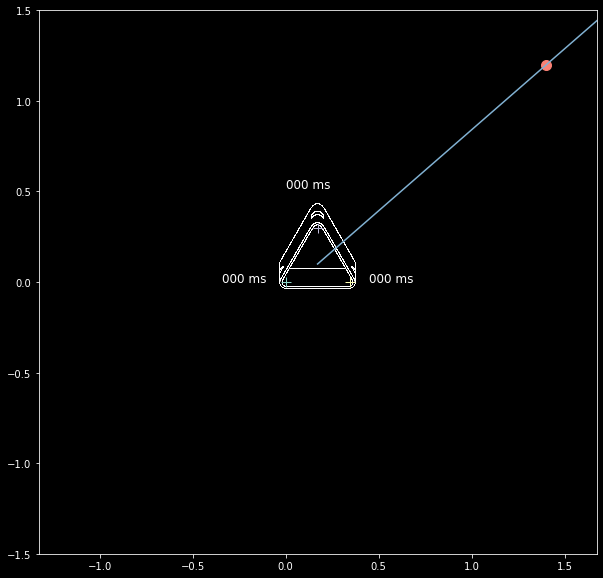

In [108]:
plt.style.use("dark_background")
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


c = 340
K = 506 * 2
G = c * K * 1e-6

p_a = Point(0, 0)
p_b = Point(G, 0)
p_c = Point(G / 2, sqrt(3)/2 * G)
p_S = Point(1.4, 1.2)

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(*p_a.xy, "+", markersize=10)
ax.plot(*p_b.xy, "+", markersize=10)
ax.plot(*p_c.xy, "+", markersize=10)
ax.plot(*p_S.xy, "o", markersize=10)
ax.set_xlim([-1.5+G/2, 1.5+G/2]);
ax.set_ylim([-1.5, 1.5]);

p_0 = Polygon([p_a, p_b, p_c]).centroid
line = LineString([p_0, Point(10, p_0.y)])
line = rotate(line, angle, origin=p_0)
ax.plot(*line.xy)

img_bg = cv2.imread("triangle_figma.png")
imagebox = OffsetImage(img_bg, zoom=0.03)
ab = AnnotationBbox(imagebox, (G/2, sqrt(3)/3*G), frameon=False)
ab.set_zorder(1)
ax.add_artist(ab)
ax.text(-G, 0, "000 ms", fontsize=12)
ax.text(0, 1.5*G, "000 ms", fontsize=12)
ax.text(1.3* G, 0, "000 ms", fontsize=12)

In [103]:
thresh = 1e-2
deltas_t = np.array([0, 0, 0])
for dt in tqdm(range(1, 10**6)):
    r = dt * c * 1e-6
    wave = p_S.buffer(r).exterior
    if wave.distance(p_a) < thresh and deltas_t[0] == 0:
        deltas_t[0] = dt
    if wave.distance(p_b) < thresh and deltas_t[1] == 0:
        deltas_t[1] = dt
    if wave.distance(p_c) < thresh and deltas_t[2] == 0:
        deltas_t[2] = dt
    if deltas_t.min() > 0:
        break
        
deltas_t

  0%|          | 0/999999 [00:00<?, ?it/s]

array([5399, 4677, 4458])

In [104]:
pivot = deltas_t.min()
#pivot_idx = np.argmin(deltas_t)
deltas_diff = deltas_t - pivot
deltas_diff

array([941, 219,   0])

In [105]:
angle, dist = calculate(*deltas_diff, K)
angle, dist

(41.80661970709407, 4738.277881101427)

## Plot

In [114]:
def init_ax(fig):
    
    plt.style.use("dark_background")
    
    ax = fig.add_subplot(111)
    img_bg = cv2.imread("triangle_figma.png")
    imagebox = OffsetImage(img_bg, zoom=0.03)
    ab = AnnotationBbox(imagebox, (G/2, sqrt(3)/3*G), frameon=False)
    ab.set_zorder(1)
    ax.add_artist(ab)
    #ax.plot(*p_a.xy, "+", markersize=10, color="white")
    #ax.plot(*p_b.xy, "+", markersize=10, color="white")
    #ax.plot(*p_c.xy, "+", markersize=10, color="white")
    ax.plot(*p_S.xy, "o", markersize=10, color="green")
    ax.set_xlim([-1.5+G/2, 1.5+G/2]);
    ax.set_ylim([-1.5, 1.5])
    
    return ax


def make_mp4(fp_in, fp_out):
    first_file = sorted(glob(fp_in))[0]
    w, h = cv2.imread(first_file).shape[:2]

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    outVid = cv2.VideoWriter(fp_out, fourcc, 30.0, (h, w))
    for file in sorted(glob(fp_in)):
        frame = cv2.imread(file)
        outVid.write(frame)
    outVid.release()

In [115]:
def plot_sequence(source_id, angle, is_good=False):

    print(f" # [AudioDetection] Making {source_id}")
    
    img_path = f"img_{source_id}/"
    Path(img_path).mkdir(exist_ok=True)

    fig = plt.figure(figsize=(10, 10))

    deltas_t = np.zeros(3)
    distances = np.array([np.inf, np.inf, np.inf])
    counter_no_improve = np.zeros(3)
    textpos = {
        0:(-G, 0),
        1: (1.3* G, 0),
        2: (0, 1.5*G),
    }
    
    max_count_no_improve = 5
    r_within = 0.1
    final_img_repeat = 60

    for dt in tqdm(range(1, 10**4)):

        ax = init_ax(fig)

        r = dt * c * 1e-4
        wave = p_S.buffer(r).exterior
        
        # iterations
        if not is_good:
            for idx, p in enumerate([p_a, p_b, p_c]):
                dist = wave.distance(p)
                if dist < distances[idx]:
                    deltas_t[idx] = dt
                    distances[idx] = dist
                    if dist < r_within:
                        ls_circle_within = Point(p).buffer(r_within).exterior
                        ax.plot(*ls_circle_within.xy, color="#0033E8")
                else:
                    ax.text(textpos[idx][0], textpos[idx][1], f"{deltas_t[idx] / 10:.2f} ms", fontsize=12, color="white")
                    counter_no_improve[idx] += 1
        
        # post-process
        if all(counter_no_improve > 5):
            p_0 = Polygon([p_a, p_b, p_c]).centroid
            line = LineString([p_0, Point(10, p_0.y)])
            line = rotate(line, angle, origin=p_0)
            ax.plot(*line.xy)
            ax.text(0, 1.2, f"Detected audio angle: {angle:.2f} degree", fontsize=15, color="white")
            for jdx in range(1, final_img_repeat):
                ax.axis("off")
                plt.savefig(f"{img_path}/{dt+jdx:05}.jpg")
            break

        else:
            ax.plot(*wave.xy)
            ax.axis("off")
            plt.savefig(f"{img_path}/{dt:05}.jpg")
            if is_good and dt > 120:
                break

        ax.remove()

    make_mp4(f"{img_path}/*", f"/Users/vincentmaladiere/Desktop/circle_{source_id}.mp4")
    
    print(" # [AudioDetection] Done!")

 # [AudioDetection] Making 4


  0%|          | 0/9999 [00:00<?, ?it/s]

 # [AudioDetection] Done!


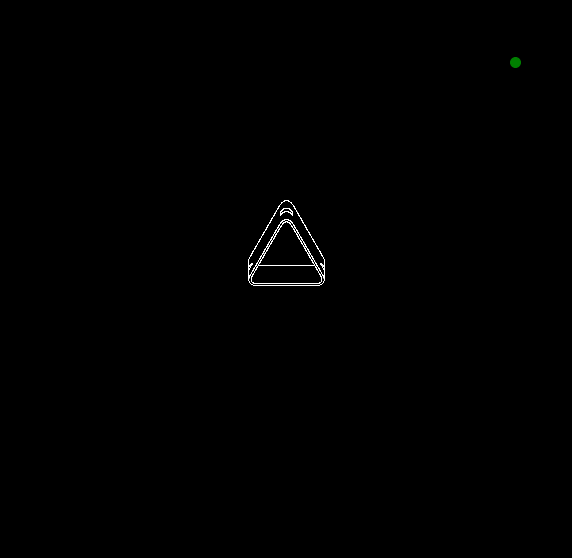

In [117]:
plot_sequence(4, angle, is_good=True)

In [ ]:
bg_file = "triangle.png"
img_bg = cv2.imread(bg_file)
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)
plt.imshow(img_bg)

In [116]:
rm img_4/*